## 2.18 Homework

### Dataset

In this homework, we will use the New York City Airbnb Open Data. You can take it from
[Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

The goal of this homework is to create a regression model for prediction apartment prices (column `'price'`).

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns # for visualization
from matplotlib import pyplot as plt
%matplotlib inline


### EDA

* Load the data.
* Look at the `price` variable. Does it have a long tail? 

In [3]:
df = pd.read_csv('AB_NYC_2019.csv')

In [5]:
df.shape

(48895, 16)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


All columns names in acceptable format with underscore. So we don't need to change them. Now preprocess the values of columns to make them lowercase and replace space with underscore.

In [7]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [9]:
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
39137,30537851,upper_west_side_3-bedroom,81009456,carolina,manhattan,upper_west_side,40.80368,-73.96662,entire_home/apt,133,1,2,2018-12-29,0.28,1,0
45405,34721879,prime_central_park_location_-_2_mins_to_subway,261894786,ariana,manhattan,east_harlem,40.79247,-73.94892,entire_home/apt,109,1,8,2019-06-28,5.11,1,233
22779,18444575,"bright,_open_1bd_in_the_heart_of_nolita",5945526,mimi,manhattan,little_italy,40.72002,-73.99629,entire_home/apt,150,3,12,2019-01-01,0.47,1,0
5100,3663798,"big_wburg_rm,_5_min_from_l,_fits_4!",18272570,qian,brooklyn,williamsburg,40.70917,-73.94918,private_room,119,2,43,2016-06-30,0.72,1,0
14154,10882066,romantic_williamsburg_apartment,14585417,samantha,brooklyn,williamsburg,40.71319,-73.95669,entire_home/apt,185,2,122,2019-06-10,3.12,1,105


Let's check the distribution in target column - price

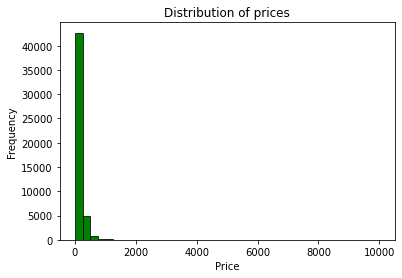

In [20]:
plt.figure(figsize=(6, 4))

sns.histplot(df.price, bins=40, color='green', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [12]:
df.price.value_counts()

100     2051
150     2047
50      1534
60      1458
200     1401
        ... 
2103       1
1799       1
1095       1
935        1
822        1
Name: price, Length: 674, dtype: int64

Look close to the distribition by using filter

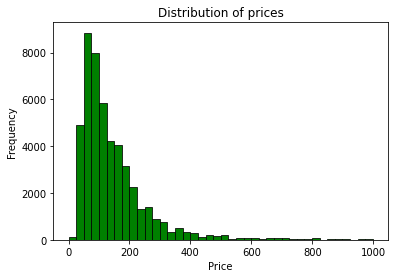

In [21]:
plt.figure(figsize=(6, 4))

sns.histplot(df.price[df.price < 1000], bins=40, color='green', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

Distribution has a tail, so we need to normalize value of the prices

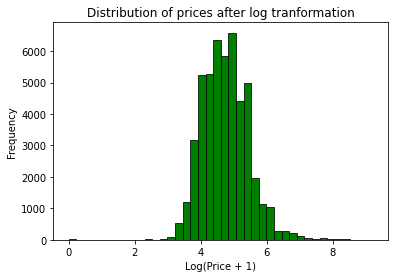

In [22]:
log_price = np.log1p(df.price)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='green', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()


Now distribution looks like a normal distribution.

In [23]:
df.isnull().sum()# check for null values

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'price'`,
* `'minimum_nights'`,
* `'number_of_reviews'`,
* `'reviews_per_month'`,
* `'calculated_host_listings_count'`,
* `'availability_365'`

Select only them.

In [24]:
df_less_cols = df [['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count',
'availability_365']]

In [25]:
df_less_cols.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


### Question 1

Find a feature with missing values. How many missing values does it have?

In [28]:
df_less_cols.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Missing 10052 values in the column `'reviews_per_month'`

### Question 2

What's the median (50% percentile) for variable 'minimum_nights'?

In [30]:
df_less_cols['minimum_nights'].mean()

7.029962163820431

### Split the data
​
* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('price') is not in your dataframe.
* Apply the log transformation to the price variable using the `np.log1p()` function.

In [31]:
np.random.seed(42)

n = len(df_less_cols)

#split data set
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [33]:
print(len(df_train))
print(len(df_val))
print(len(df_test))

29337
9779
9779


In [32]:
y_train_orig = df_train.price.values
y_val_orig = df_val.price.values
y_test_orig = df_test.price.values

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?


In [50]:
middle = df_train.reviews_per_month.mean()

In [ ]:
#df.fillna(0)
#df.filna(value = middle)

In [ ]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

### Linear Regression

In [42]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

### Baseline solution

In [39]:
base = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count',
'availability_365']

In [40]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [51]:
def prepare_X_mean(df):
    df_num = df[base]
    df_num = df_num.fillna(value = middle)
    X = df_num.values
    return X

In [43]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [44]:
y_pred = w_0 + X_train.dot(w)

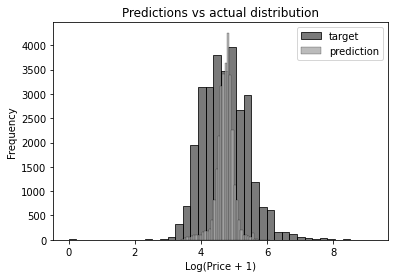

In [45]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [46]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [47]:
rmse(y_train, y_pred)

0.6428860484860419

In [48]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [49]:
rmse(y_val, y_pred)

0.6430337788468029

Train model with nan filled by median

In [52]:
X_train = prepare_X_mean(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [53]:
y_pred = w_0 + X_train.dot(w)

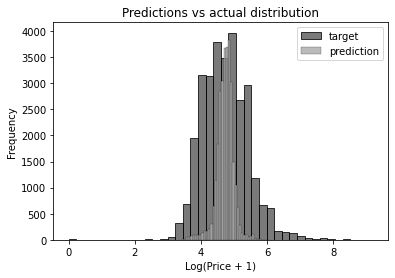

In [54]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [55]:
rmse(y_train, y_pred)

0.6429347474014209

In [56]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [57]:
rmse(y_val, y_pred)

0.6429182536885074

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)


> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?